In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from matplotlib import ticker
rcParams["figure.figsize"] = (10,8)
plt.style.use("science")
import eispac
from glob import glob
import sunpy
import cmcrameri.cm as cmcm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from astropy.visualization import ImageNormalize, SqrtStretch, LogStretch
from scipy import interpolate
from scipy import ndimage
from juanfit import SpectrumFitSingle, SpectrumFitRow
rcParams['axes.labelsize'] = 18
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['font.size'] = 18
rcParams['figure.figsize'] = [10,10]
from scipy.interpolate import interp1d


In [2]:
def plot_colorbar(im, ax, width="3%", height="100%",loc="lower left",fontsize=14):
    clb_ax = inset_axes(ax,width=width,height=height,loc=loc,
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
    clb_ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    clb_ax.yaxis.get_offset_text().set_fontsize(fontsize)
    clb_ax.tick_params(labelsize=fontsize)
    return clb, clb_ax

In [3]:
data_filepath = '../../src/EIS/level1/EastOffLimbFullSpectra/eis_20170821_205401.data.h5'
fe_10_184_fit_file = "../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_10_184_536.1c-0.fit.h5"
fe_14_264_fit_file = "../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_14_264_787.1c-0.fit.h5"

Reading fit result from, 
   ../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_10_184_536.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


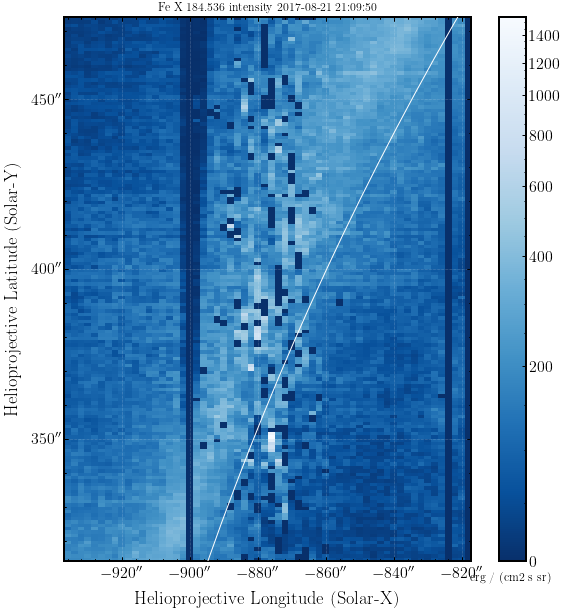

In [32]:
rcParams['figure.figsize'] = [10,10]
fe_10_184_fit_res = eispac.read_fit(fe_10_184_fit_file)
fe_10_184_inten_map = fe_10_184_fit_res.get_map(component=0, measurement='intensity')
fe_10_184_inten_map.peek(draw_limb=True)

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


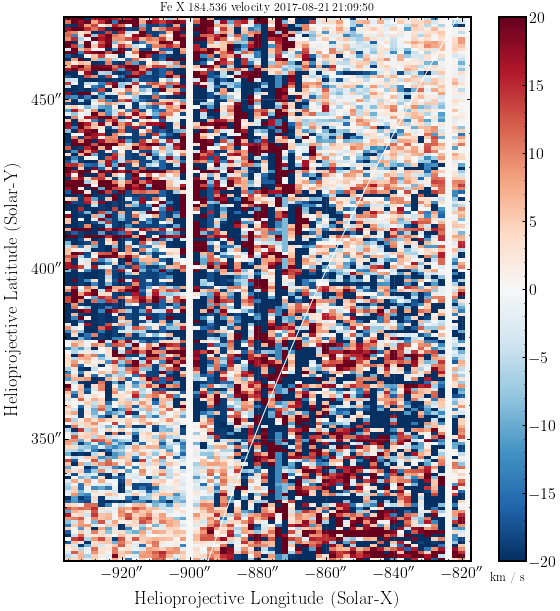

In [33]:
fe_10_184_vel_map = fe_10_184_fit_res.get_map(0, 'vel')
fe_10_184_vel_map.plot_settings['norm'] = ImageNormalize(vmin=-20, vmax=20)
fe_10_184_vel_map.peek(draw_limb=True)

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


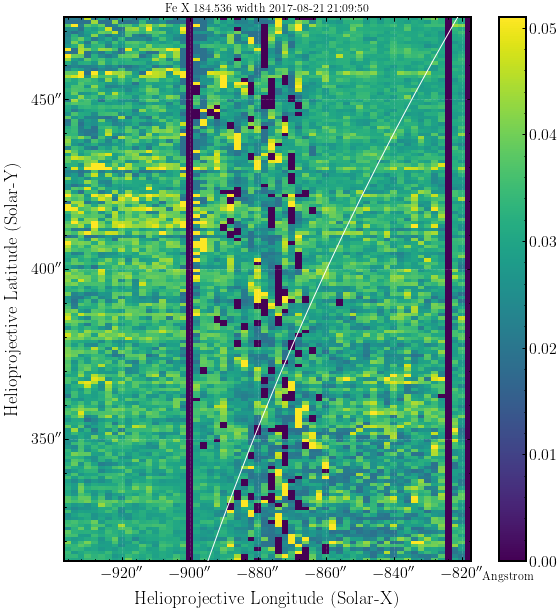

In [34]:
fe_10_184_width_map = fe_10_184_fit_res.get_map(0, 'width')
fe_10_184_width_map.peek(draw_limb=True)

Reading fit result from, 
   ../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_14_264_787.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


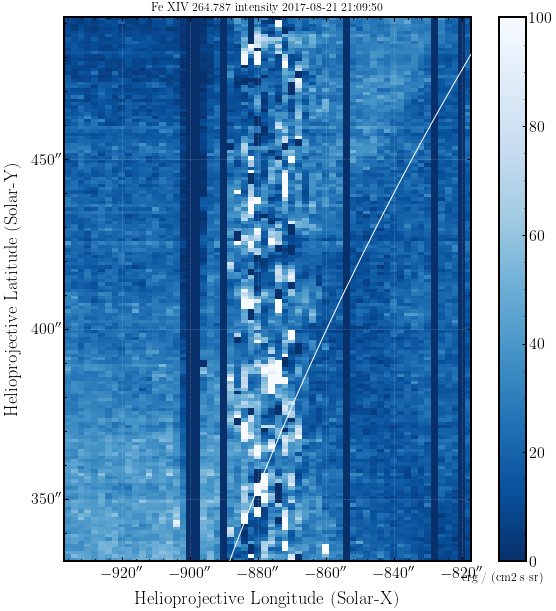

In [35]:
fe_14_264_fit_res = eispac.read_fit(fe_14_264_fit_file)
fe_14_264_inten_map = fe_14_264_fit_res.get_map(component=0, measurement='intensity')
fe_14_264_inten_map.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=100)
fe_14_264_inten_map.peek(draw_limb=True)

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


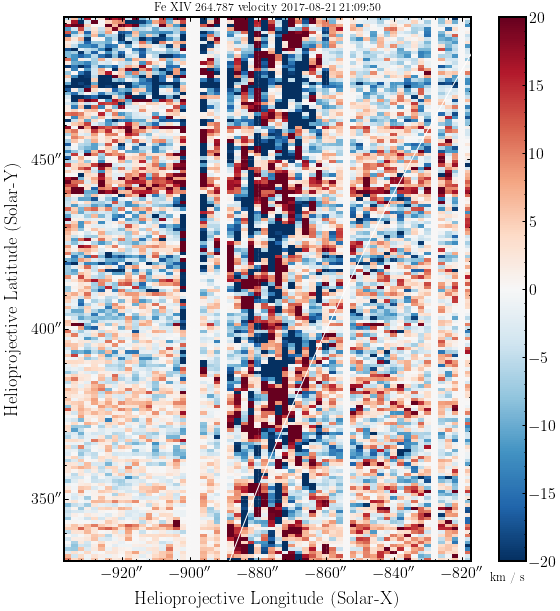

In [36]:
fe_14_264_vel_map = fe_14_264_fit_res.get_map(0, 'vel')
fe_14_264_vel_map.plot_settings['norm'] = ImageNormalize(vmin=-20, vmax=20)
fe_14_264_vel_map.peek(draw_limb=True)

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


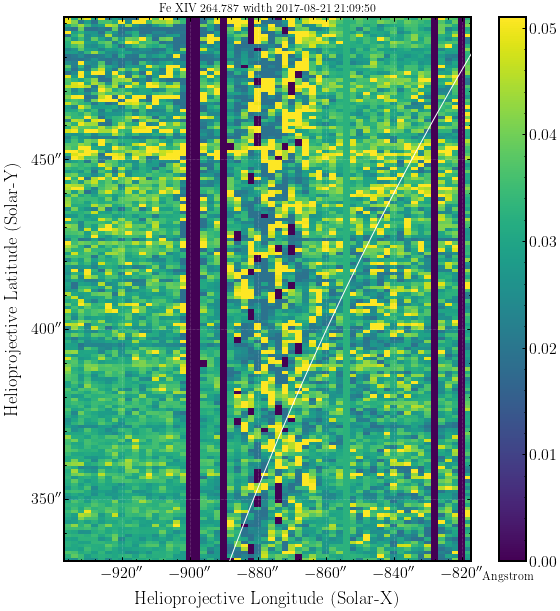

In [37]:
fe_14_264_width_map = fe_14_264_fit_res.get_map(0, 'width')
fe_14_264_width_map.peek(draw_limb=True)

In [24]:
data_cube_0 = eispac.read_cube(data_filepath,0)
data_cube_1 = eispac.read_cube(data_filepath,1)
data_cube_2 = eispac.read_cube(data_filepath,2)
data_cube_3 = eispac.read_cube(data_filepath,3)

Data file,
   /Users/yjzhu/Desktop/Solar/Eclipse2017/src/EIS/level1/EastOffLimbFullSpectra/eis_20170821_205401.data.h5
Header file,
   /Users/yjzhu/Desktop/Solar/Eclipse2017/src/EIS/level1/EastOffLimbFullSpectra/eis_20170821_205401.head.h5
Found window 0
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
Data file,
   /Users/yjzhu/Desktop/Solar/Eclipse2017/src/EIS/level1/EastOffLimbFullSpectra/eis_20170821_205401.data.h5
Header file,
   /Users/yjzhu/Desktop/Solar/Eclipse2017/src/EIS/level1/EastOffLimbFullSpectra/eis_20170821_205401.head.h5
Found window 1
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
Data file,
   /Users/yjzhu/Desktop/Solar/Eclipse2017/src/EIS/level1/EastOffLimbFullSpectra/eis_20170821_205401.data.h5
Header file,
   /Users/yjzhu/Desktop/Solar/Eclipse2017/src/EIS/level1/EastOffLimbFullSpectra/eis_20170821_205401.head.h5
Found window 2
INFO: uncertainty should have attribute uncertainty_type. [astropy.ndda

In [25]:
data_cube_0.wavelength.shape

(160, 60, 1024)

In [26]:
data_cube_0.meta.keys()

dict_keys(['filename_data', 'filename_head', 'wininfo', 'iwin', 'iwin_str', 'index', 'pointing', 'wave', 'radcal', 'slit_width', 'slit_width_units', 'ccd_offset', 'wave_corr', 'wave_corr_t', 'wave_corr_tilt', 'date_obs', 'date_obs_format', 'duration', 'duration_units', 'mod_index', 'aspect', 'aspect_ratio', 'extent_arcsec', 'notes'])

In [73]:
data_cube_0.meta["extent_arcsec"]

[-936.2666082382202, -816.4586114883423, 314.5737609863281, 474.5737609863281]

In [67]:
slit_width_aver = np.average(data_cube_0.meta["slit_width"].reshape(-1,10),axis=1)

In [27]:
data_cube_0.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'WAVE'  'HPLN-TAN'  'HPLT-TAN'  
CRVAL : 1.6640280537002152e-08  -0.26007405784395005  0.08738160027398004  
CRPIX : 1.0  1.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 2.230382577710088e-12  0.0005546666516198053  0.0002777777777777778  
NAXIS : 1024  60  160

(600.0, 650.0)

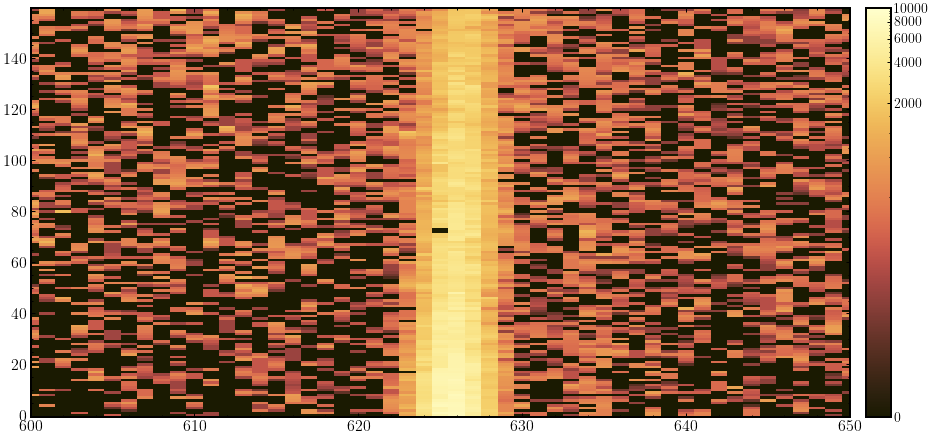

In [28]:
fig, ax = plt.subplots(figsize=(12,6),constrained_layout=True)
im = ax.pcolormesh(np.arange(1024),np.arange(160),data_cube_0.data[:,0,:],shading="auto",cmap=cmcm.lajolla_r,
                    rasterized=True,norm=ImageNormalize(data_cube_0.data[:,0,:],vmin=0,vmax=1e4,stretch=LogStretch()))
plot_colorbar(im,ax)
ax.set_xlim(600,650)

In [29]:
def interp_window_slit_tilt(data,wvl):
    data_shape = data.shape
    data_interp = np.zeros(data_shape)
    for ii in range(data_shape[0]):
        f = interp1d(wvl[ii,:],data[ii,:],kind="cubic",fill_value="extrapolate")
        data_interp[ii,:] = f(wvl[0,:])
    
    return data_interp

In [87]:
data_0_interp = np.zeros_like(data_cube_0.data)
for ii in range(60):
    data_0_interp[:,ii,:] = interp_window_slit_tilt(data_cube_0.data[:,ii,:],data_cube_0.wavelength[:,ii,:])

In [88]:
FeX_184_bin_fit = np.zeros((16,4,4))
FeX_184_slice = slice(800,830)
for ii in range(4):
    data_masked = np.copy(data_0_interp)
    data_masked[np.where(data_masked < -200)] = np.nan
    FeX_184_bin_ = np.nanmean(data_masked[:,ii*3:(ii+1)*3,FeX_184_slice],axis=1)
    FeX_184_bin_ = np.nanmean(FeX_184_bin_.reshape(-1,10,30),axis=1)

    FeX_184_bin_fit_model = SpectrumFitRow(data=FeX_184_bin_, wvl=data_cube_0.wavelength[0,ii*3,FeX_184_slice],line_number=1,
                                            line_wvl_init=[184.5],int_max_init=[1e3],fwhm_init=[0.07])
    # FeX_184_bin_fit_model.plot_fit(plot_fit=False)
    FeX_184_bin_fit_model.run_lse()
    FeX_184_bin_fit[:,ii,0] = FeX_184_bin_fit_model.line_wvl_fit[:,0]
    FeX_184_bin_fit[:,ii,1] = FeX_184_bin_fit_model.int_total_fit[:,0]
    FeX_184_bin_fit[:,ii,2] = FeX_184_bin_fit_model.fwhm_fit[:,0]
    FeX_184_bin_fit[:,ii,3] = FeX_184_bin_fit_model.int_cont_fit[:]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:205: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


(<matplotlib.colorbar.Colorbar at 0x186c015d0>, <AxesHostAxes:>)

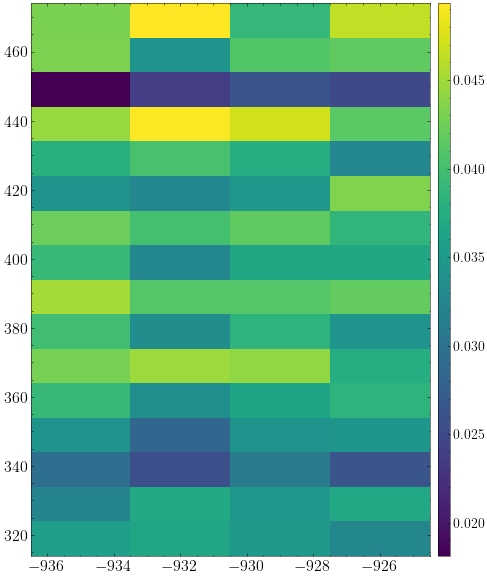

In [89]:
fig, ax = plt.subplots(figsize=(6,8),constrained_layout=True)

im = ax.pcolormesh(np.arange(-935, -924,3),np.arange(319, 474, 10),np.sqrt(FeX_184_bin_fit[:,:,2]**2 - 0.062**2))
plot_colorbar(im,ax,width="3%")
# ax.set_aspect(1)

(<matplotlib.colorbar.Colorbar at 0x187df5e10>, <AxesHostAxes:>)

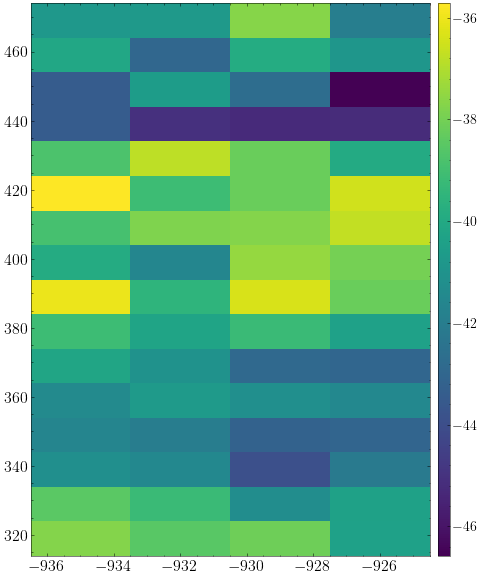

In [90]:
fig, ax = plt.subplots(figsize=(6,8),constrained_layout=True)

im = ax.pcolormesh(np.arange(-935, -924,3),np.arange(319, 474, 10),(FeX_184_bin_fit[:,:,0] - 184.537)/184.537*3e5,)
plot_colorbar(im,ax)

In [79]:
FeX_184_bin_fit[:,:,0]

array([[184.51431253, 184.51381742, 184.51410249, 184.51264486],
       [184.51502231, 184.51458424, 184.51331384, 184.51386524],
       [184.51452231, 184.51434094, 184.5128543 , 184.51395929],
       [184.51543165, 184.51521742, 184.51449012, 184.51455289],
       [184.51677657, 184.51720606, 184.51689122, 184.51669497],
       [184.51870162, 184.51816791, 184.51703656, 184.51694946],
       [184.52054389, 184.51987093, 184.52048052, 184.5197409 ],
       [184.52244052, 184.52063585, 184.52262005, 184.52155305],
       [184.5223523 , 184.52131185, 184.52388725, 184.52356466],
       [184.52402605, 184.5248105 , 184.52486304, 184.52548253],
       [184.52659597, 184.52448837, 184.52527175, 184.52597561],
       [184.5264536 , 184.52778433, 184.526896  , 184.52583623],
       [184.52605373, 184.52525258, 184.52489232, 184.52452436],
       [184.52595962, 184.52770343, 184.526369  , 184.52400804],
       [184.52909348, 184.5273535 , 184.52926383, 184.52864494],
       [184.52984278, 184